In [13]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVR

#visaualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.5)

In [14]:
# Find out your current working directory
#import os
#print(os.getcwd())

# Out: /Users/shane/Documents/blog

# Display all of the files found in your current working directory
#print(os.listdir(os.getcwd()))

In [15]:
wine = pd.read_csv("winequalityN-white.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


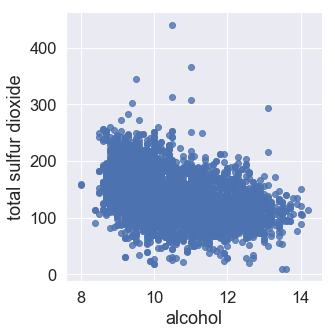

In [16]:
#plotting two features as a visualization
#sns.lmplot ('fixed acidity', 'residual sugar', data = wine, hue = 'type', palette = 'Set1', fit_reg = False )
sns.lmplot ('alcohol', 'total sulfur dioxide', data = wine, palette = 'Set2', fit_reg = False )

In [17]:
#dropping the label from feature set
X = wine.drop('quality', axis = 1)
X = X.interpolate(method='linear', limit_direction='forward', axis=0)
#storing the label
y = wine['quality']
y = y.interpolate(method='linear', limit_direction='forward', axis=0)

X,y

(      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
 0               7.0             0.270         0.36           20.70      0.045   
 1               6.3             0.300         0.34            1.60      0.049   
 2               8.1             0.280         0.40            6.90      0.050   
 3               7.2             0.230         0.32            8.50      0.058   
 4               7.2             0.230         0.32            8.50      0.058   
 5               8.1             0.280         0.40            6.90      0.050   
 6               6.2             0.320         0.16            7.00      0.045   
 7               7.0             0.270         0.36           20.70      0.045   
 8               6.3             0.300         0.34            1.60      0.049   
 9               8.1             0.220         0.43            1.50      0.044   
 10              8.1             0.270         0.41            1.45      0.033   
 11             

In [18]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(3262, 11)
(1608, 11)
(3262,)
(1608,)


In [19]:
from sklearn.preprocessing import StandardScaler
##Standardize the data for features
scaler = StandardScaler()
scaler.fit(X_train) #fitting on training set 
# Transformation for both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print(X_train)
print(X_train.mean())
print(X_train.shape)
print(y_train.shape)

[[ 1.23716224  2.23080394  0.21406023 ... -0.64949443  0.39680672
  -0.66143178]
 [-0.065798   -0.48713097 -0.11303403 ...  0.6900673   0.48579837
   1.60308146]
 [-0.65805266  0.09528365 -0.35835473 ... -0.11366974 -1.11605129
   1.84570788]
 ...
 [ 1.11871131  1.45425111  1.27711659 ... -0.314604   -1.20504294
   0.63257578]
 [-0.53960173 -0.97247649 -0.44012829 ...  0.42215495 -1.20504294
  -0.014428  ]
 [-0.18424893  2.13373483  0.37760736 ...  0.89100156  0.48579837
  -0.74230726]]
-5.147583305301769e-16
(3262, 11)
(3262,)


In [20]:
y_train = y_train.values.reshape(-1,1)
y_train = np.asarray(y_train, dtype = int) #transofmation to integers to avoid classifiation error of continous label
y_test = y_test.values.reshape(-1,1)
y_test = np.asarray(y_test, dtype = int)
print(y_train)
print(y_test)
print(y_test.shape)
print(y_train.shape)

[[5]
 [6]
 [7]
 ...
 [6]
 [6]
 [5]]
[[6]
 [5]
 [8]
 ...
 [6]
 [6]
 [7]]
(1608, 1)
(3262, 1)


In [21]:
#fitting the model
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)

[6 5 6 ... 5 6 6]
[[6]
 [5]
 [8]
 ...
 [6]
 [6]
 [7]]


In [23]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0   4   4   0   0   0]
 [  0   2  29  16   0   0   0]
 [  0   2 275 205   3   0   0]
 [  0   0 124 558  21   0   0]
 [  0   0  10 221  62   0   0]
 [  0   0   0  57  13   0   0]
 [  0   0   0   0   2   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         8
           4       0.50      0.04      0.08        47
           5       0.62      0.57      0.59       485
           6       0.53      0.79      0.63       703
           7       0.61      0.21      0.31       293
           8       0.00      0.00      0.00        70
           9       0.00      0.00      0.00         2

   micro avg       0.56      0.56      0.56      1608
   macro avg       0.32      0.23      0.23      1608
weighted avg       0.54      0.56      0.52      1608

0.5578358208955224


C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\ocanbek3\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(rms)
print(mae)

0.7960568243923869
0.5043532338308457
